# Code Cell

**Summary:** Imports libraries.

In [ ]:
# 📦 Core and system
import os
import numpy as np
import pandas as pd


# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.offline as pyoff


# 🤖 Classical Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# 🔮 Time Series: Prophet
from prophet import Prophet


# 🔁 Time Series: Darts
import torch
from darts import TimeSeries
from darts.models import TCNModel, NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import rmse


/Users/basartemur/miniforge3/envs/scm-env/lib/python3.9/site-packages/statsforecast/utils.py:231: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



**Summary:** Calls function: `print()`.

In [ ]:
print(os.getcwd())

/Users/basartemur/Library/CloudStorage/Dropbox/02 MMDS/00 Course Work/25 FSS Ind App o AI/Projects/SCM/Notebooks


**Summary:** Executes general Python code.

In [ ]:
for dirname, _, filenames in os.walk('../Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



../Data/.DS_Store
../Data/meal_info.csv
../Data/test.csv
../Data/fulfilment_center_info.csv
../Data/train.csv
../Data/train_proc.csv


We are trying to forecast the demand after 145

## EDA

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df_CentInf = pd.read_csv('../Data/fulfilment_center_info.csv')
print(df_CentInf.head())


   center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df_MealInf = pd.read_csv('../Data/meal_info.csv')
print(df_MealInf.head())

   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df_train = pd.read_csv('../Data/train.csv')
print(df_train.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40  


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df_TrMerg1 = pd.merge(df_train, df_CentInf, how='inner', on='center_id')
print(df_TrMerg1.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code center_type  op_area  
0           56      TYPE_C      2.0  
1           56      TYPE_C      2.0  
2           56      TYPE_C      2.0  
3           56    

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df = pd.merge(df_TrMerg1, df_MealInf, how='inner', on='meal_id')
print(df.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code center_type  op_area   category cuisine  
0           56      TYPE_C      2.0  Beverages    Thai  
1           56      TYPE_C      2.0  Beverages    Thai  

**Summary:** Executes general Python code.

In [ ]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


**Summary:** Assigns values to variables.

In [ ]:
ts_tot_orders = df.groupby(['week'])['num_orders'].sum()
ts_tot_orders = pd.DataFrame(ts_tot_orders)
ts_tot_orders

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


**Summary:** Assigns values to variables.

In [ ]:
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",http://localhost:8888/notebooks/Kaggle_for_timepass/hackathon/Sigma-thon-master/Sigma-thon-master/eda1.ipynb#
    )
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

![Chart](Images/ts1.png)


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
cat_var = ['center_type',
 'category',
 'cuisine']



df_=df.copy()

for i in cat_var:
    df_[i] = pd.factorize(df_[i])[0]

print(df_.head())
df_.to_csv('../Data/train_proc.csv', index=False)


df_ = df_.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code', 'op_area', 'category', 'num_orders']] 


X = df_.drop(['num_orders'], axis=1).values
# X = df_[['center_type',
#  'category',
#  'cuisine']]
y = df_['num_orders'].values





        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code  center_type  op_area  category  cuisine  
0           56            0      2.0         0        0  
1           56            0      2.0         0        

**Summary:** Assigns values to variables.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 340.9701748303895


**Summary:** Imports libraries.

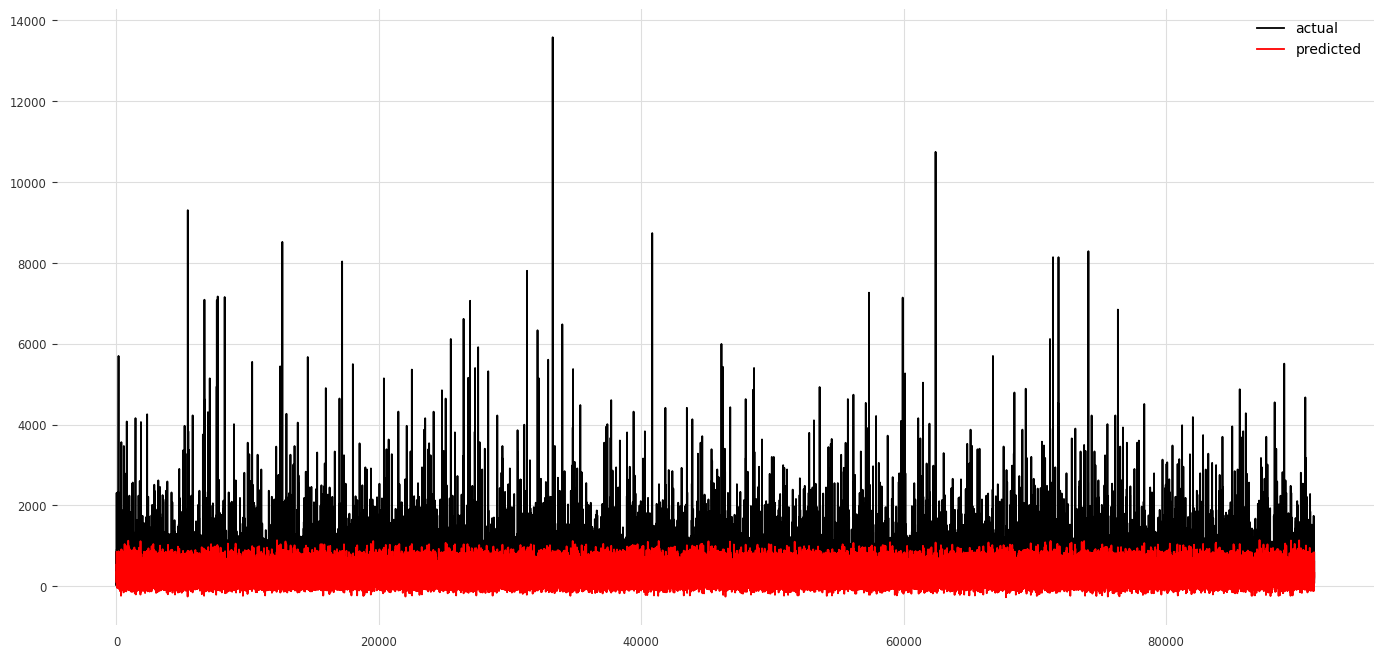

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

**Summary:** Imports libraries.

In [ ]:
import xgboost as xgb

**Summary:** Imports libraries.

In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

/Users/basartemur/miniforge3/envs/scm-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[18:44:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.



157.35168136444582


**Summary:** Imports libraries.

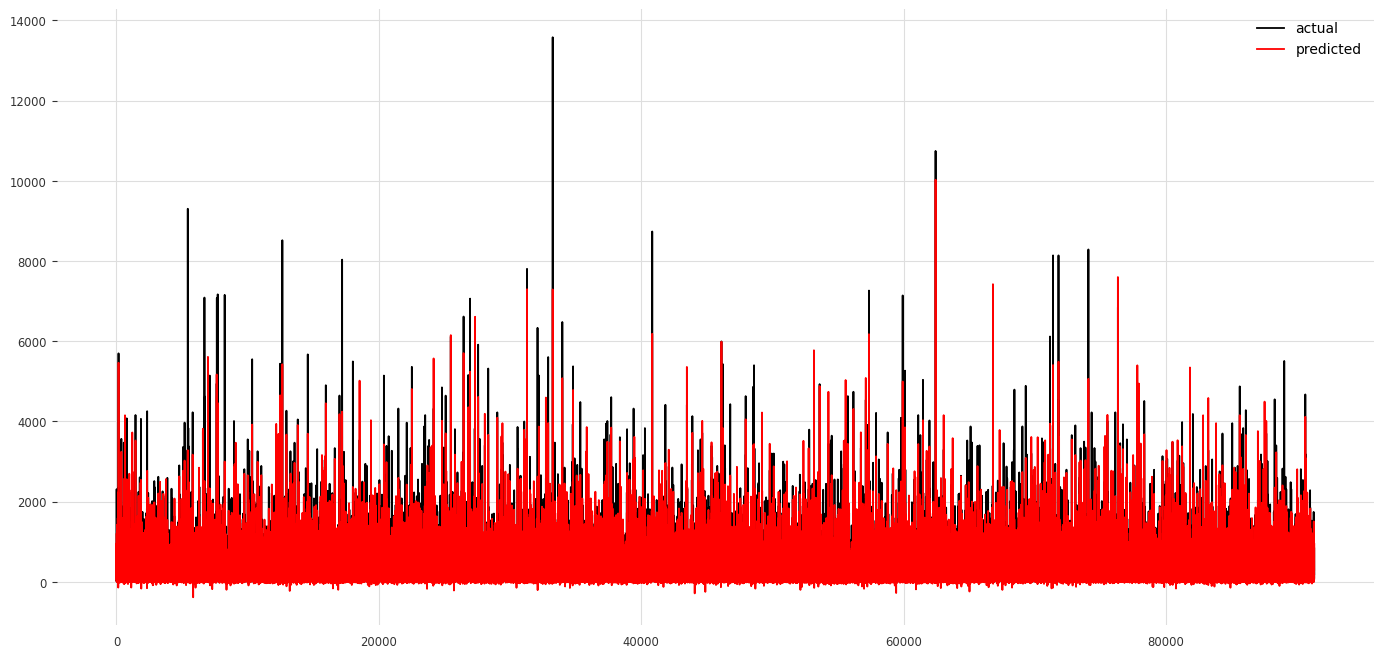

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

**Summary:** Executes general Python code.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

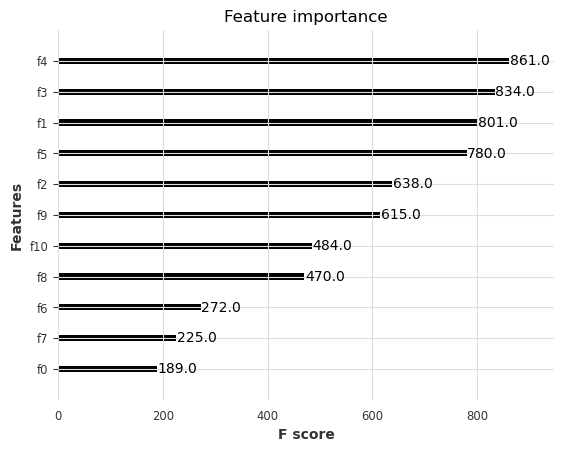

In [ ]:
xgb.plot_importance(xgb_model)

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
# read test dataset to be used for predictions
df_test = pd.read_csv('../Data/test.csv')
print(df_test.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
#Process unseen dataset
df_TstMerg1 = pd.merge(df_test, df_CentInf, how='inner', on='center_id')
print(df_TstMerg1.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        647           56   
1                      0                  0        647           56   
2                      0                  0        647           56   
3                      0                  0        647           56   
4                      0                  0        647           56   

  center_type  op_area  
0      TYPE_C      2.0  
1      TYPE_C      2.0  
2      TYPE_C      2.0  
3      TYPE_C      2.0  
4      TYPE_C      2.0  


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
#Process unseen dataset
df1 = pd.merge(df_TstMerg1, df_MealInf, how='inner', on='meal_id')
print(df1.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        647           56   
1                      0                  0        647           56   
2                      0                  0        647           56   
3                      0                  0        647           56   
4                      0                  0        647           56   

  center_type  op_area   category cuisine  
0      TYPE_C      2.0  Beverages    Thai  
1      TYPE_C      2.0  Beverages    Thai  
2      TYPE_C      2.0  Beverage

**Summary:** Assigns values to variables.

In [ ]:
#Slice unseen dataset. there is no y in unseen datset
df1 = df1.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code', 'op_area', 'category']] 

**Summary:** Calls function: `print()`.

In [ ]:
#view sliced dataset
print(df1.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  city_code  op_area   category  
0                      0                  0        647      2.0  Beverages  
1                      0                  0        647      2.0  Beverages  
2                      0                  0        647      2.0  Beverages  
3                      0                  0        647      2.0  Beverages  
4                      0                  0        647      2.0  Beverages  


**Summary:** Assigns values to variables.

In [ ]:
#split full training dataset to x and y
X_train = df_.drop(['num_orders'], axis=1).values
y_train = df_['num_orders'].values

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
#process unseen dataset for factorization
df_1=df1.copy()
cat_var = ['category']
for i in cat_var:
    df_1[i] = pd.factorize(df_1[i])[0]
# df_1 = df_1.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
#        'emailer_for_promotion', 'homepage_featured', 'city_code', 'op_area', 'category']] 
print(df_1.head())

# X = df_1.drop(['num_orders'], axis=1).values
# X = df_[['center_type',
#  'category',
#  'cuisine']]
X_test=df_1.to_numpy()

# y = df_1['num_orders'].values


        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  city_code  op_area  category  
0                      0                  0        647      2.0         0  
1                      0                  0        647      2.0         0  
2                      0                  0        647      2.0         0  
3                      0                  0        647      2.0         0  
4                      0                  0        647      2.0         0  


**Summary:** Assigns values to variables.

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

/Users/basartemur/miniforge3/envs/scm-env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[18:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.



**Summary:** Assigns values to variables.

In [ ]:
ypred = pd.DataFrame(y_pred)

**Summary:** Assigns values to variables.

In [ ]:
#join predictions to original unseen dataset
predictions = pd.merge(df_test, ypred, left_index=True, right_index=True, how='inner')

**Summary:** Assigns values to variables.

In [ ]:
#Create named column num_orders using data from column index 0
predictions['num_orders'] = predictions[0]

**Summary:** Assigns values to variables.

In [ ]:
#remove column index 0
predictions = predictions.drop([0], axis=1)

**Summary:** Assigns values to variables.

In [ ]:
#Create prediction series for plotting
ts_tot_pred = predictions.groupby(['week'])['num_orders'].sum()
ts_tot_pred = pd.DataFrame(ts_tot_pred)

**Summary:** Assigns values to variables. Imports libraries.

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=ts_tot_pred.index,
        y=ts_tot_pred['num_orders'],
        name='Predicted',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    )
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

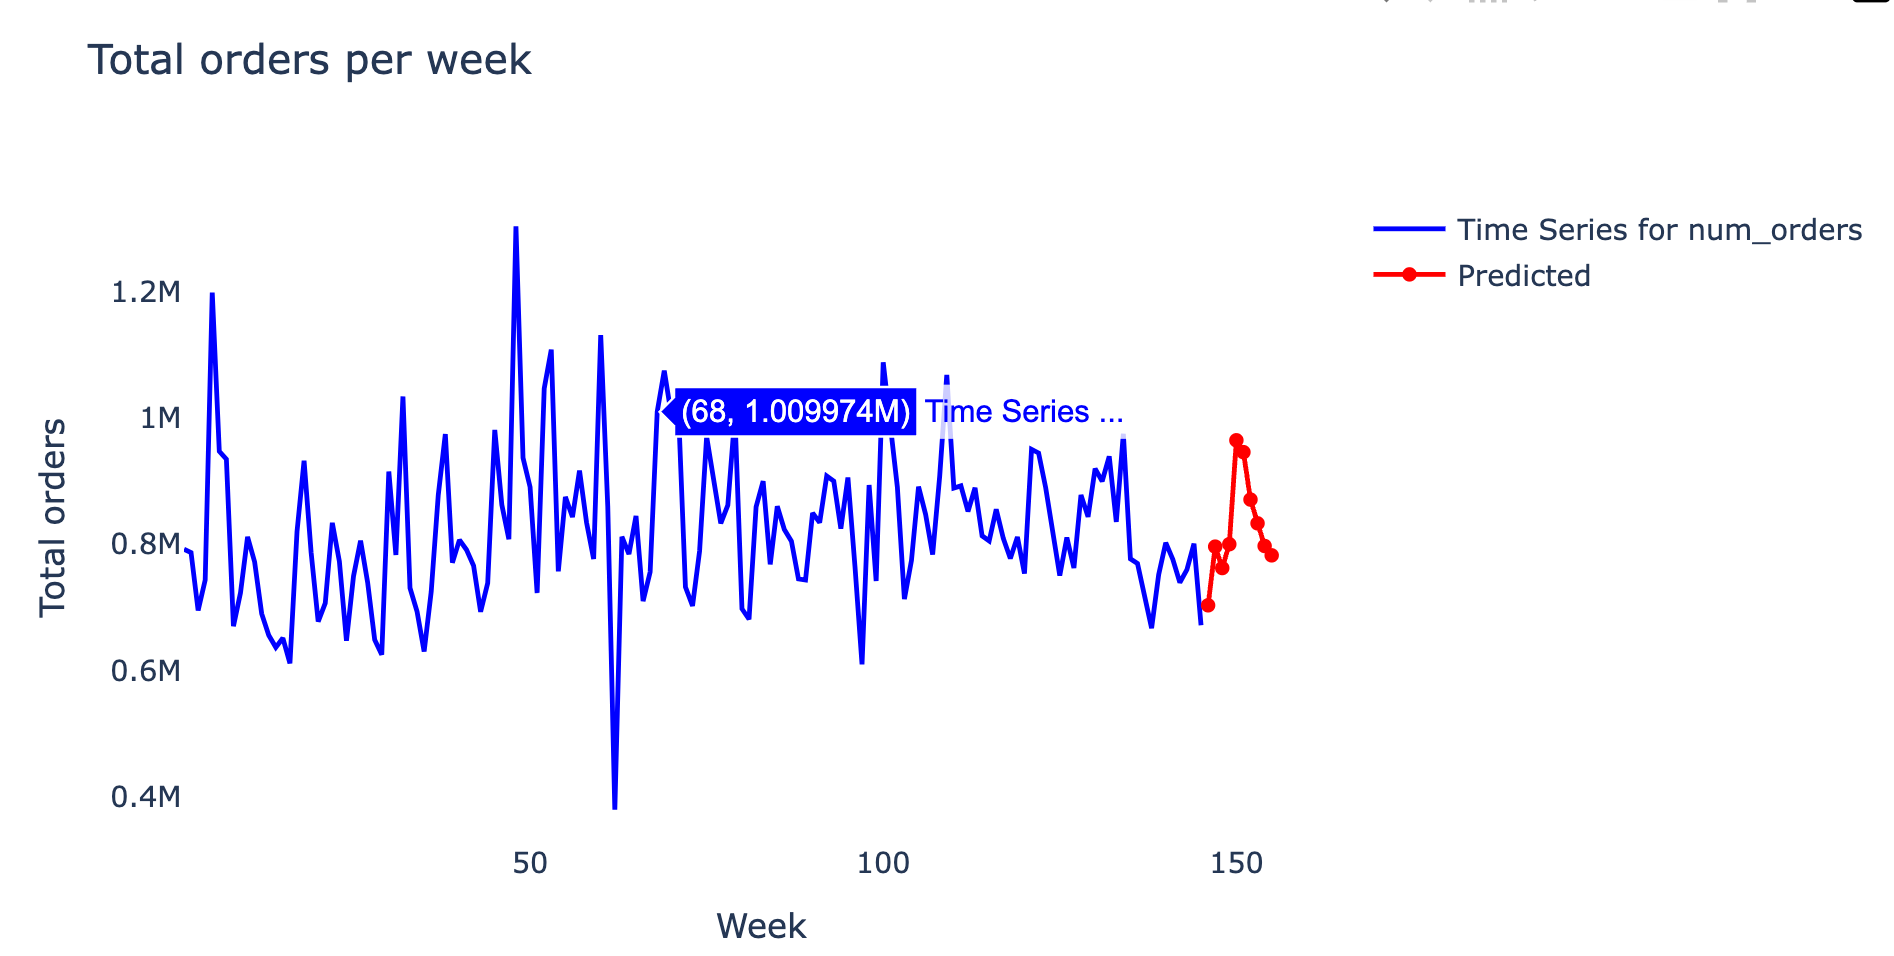

In [3]:
from IPython.display import Image, display
display(Image("Images/ts3.png"))

**Summary:** Imports libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb
import os

**Summary:** Calls function: `print()`.

In [ ]:
print(os.getcwd())

/Users/basartemur/Library/CloudStorage/Dropbox/02 MMDS/00 Course Work/25 FSS Ind App o AI/Projects/SCM/Notebooks


**Summary:** Assigns values to variables.

In [ ]:
# Load and prepare the dataset
df = pd.read_csv("../Data/train_proc.csv")
df['ds'] = pd.to_datetime(df['week'])
df['y'] = df['num_orders']
df.drop(['week', 'num_orders'], axis=1, inplace=True)

**Summary:** Assigns values to variables.

In [ ]:
# Sort by group and date
df = df.sort_values(['center_id', 'meal_id', 'ds'])

# Add promotion_last_week feature
df['promotion'] = df['emailer_for_promotion'] | df['homepage_featured']
# Apply lag within group
df['promotion_last_week'] = df.groupby(['center_id', 'meal_id'])['promotion'].shift(1).fillna(0).astype(int)
# df['promotion_last_week'] = df['promotion'].shift(1).fillna(0).astype(int)



**Summary:** Assigns values to variables.

In [ ]:
# Time-based split
df = df.sort_values('ds').reset_index(drop=True)
split_index = int(len(df) * 0.8)
df_train = df.iloc[:split_index].copy()
df_test = df.iloc[split_index:].copy()

**Summary:** Assigns values to variables.

In [ ]:
# Define categorical and continuous features
categorical_vars = ['center_id', 'meal_id', 'emailer_for_promotion',
                    'homepage_featured', 'city_code', 'op_area', 'category', 'promotion_last_week']
continuous_vars = ['checkout_price', 'base_price']

**Summary:** Assigns values to variables.

In [ ]:
# One-hot encode categorical variables
df_combined = pd.concat([df_train, df_test])
df_combined = df_combined.loc[:, ['ds', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code', 'op_area', 'category', 'promotion_last_week', 'y']]
df_encoded = pd.get_dummies(df_combined, columns=categorical_vars)

**Summary:** Assigns values to variables.

In [ ]:
df_train_encoded = df_encoded.iloc[:len(df_train)].copy()
df_test_encoded = df_encoded.iloc[len(df_train):].copy()

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
# Prophet model
model = Prophet()
all_regressors_prophet = [col for col in df_train_encoded.columns if col not in ['ds', 'y']]
for reg in all_regressors_prophet:
    model.add_regressor(reg)
print(all_regressors_prophet)


['checkout_price', 'base_price', 'center_id_10', 'center_id_11', 'center_id_13', 'center_id_14', 'center_id_17', 'center_id_20', 'center_id_23', 'center_id_24', 'center_id_26', 'center_id_27', 'center_id_29', 'center_id_30', 'center_id_32', 'center_id_34', 'center_id_36', 'center_id_39', 'center_id_41', 'center_id_42', 'center_id_43', 'center_id_50', 'center_id_51', 'center_id_52', 'center_id_53', 'center_id_55', 'center_id_57', 'center_id_58', 'center_id_59', 'center_id_61', 'center_id_64', 'center_id_65', 'center_id_66', 'center_id_67', 'center_id_68', 'center_id_72', 'center_id_73', 'center_id_74', 'center_id_75', 'center_id_76', 'center_id_77', 'center_id_80', 'center_id_81', 'center_id_83', 'center_id_86', 'center_id_88', 'center_id_89', 'center_id_91', 'center_id_92', 'center_id_93', 'center_id_94', 'center_id_97', 'center_id_99', 'center_id_101', 'center_id_102', 'center_id_104', 'center_id_106', 'center_id_108', 'center_id_109', 'center_id_110', 'center_id_113', 'center_id_124'

**Summary:** Executes general Python code.

In [ ]:
model.fit(df_train_encoded[['ds', 'y'] + all_regressors_prophet])


23:05:16 - cmdstanpy - INFO - Chain [1] start processing
23:08:34 - cmdstanpy - INFO - Chain [1] done processing


**Summary:** Assigns values to variables.

In [ ]:
# Forecast on train set and compute residuals
prophet_train_forecast = model.predict(df_train_encoded[['ds'] + all_regressors_prophet])
df_train_encoded['residual'] = df_train_encoded['y'] - prophet_train_forecast['yhat']

/Users/basartemur/miniforge3/envs/scm-env/lib/python3.9/site-packages/prophet/forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)


**Summary:** Assigns values to variables.

In [ ]:
# Train XGBoost on residuals
all_regressors_xgb=all_regressors_prophet
X_train_xgb = df_train_encoded[all_regressors_xgb]
y_train_xgb = df_train_encoded['residual']

**Summary:** Assigns values to variables.

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Summary:** Calls function: `print()`.

In [ ]:
print(all_regressors_xgb)
print(all_regressors_prophet)

['checkout_price', 'base_price', 'center_id_10', 'center_id_11', 'center_id_13', 'center_id_14', 'center_id_17', 'center_id_20', 'center_id_23', 'center_id_24', 'center_id_26', 'center_id_27', 'center_id_29', 'center_id_30', 'center_id_32', 'center_id_34', 'center_id_36', 'center_id_39', 'center_id_41', 'center_id_42', 'center_id_43', 'center_id_50', 'center_id_51', 'center_id_52', 'center_id_53', 'center_id_55', 'center_id_57', 'center_id_58', 'center_id_59', 'center_id_61', 'center_id_64', 'center_id_65', 'center_id_66', 'center_id_67', 'center_id_68', 'center_id_72', 'center_id_73', 'center_id_74', 'center_id_75', 'center_id_76', 'center_id_77', 'center_id_80', 'center_id_81', 'center_id_83', 'center_id_86', 'center_id_88', 'center_id_89', 'center_id_91', 'center_id_92', 'center_id_93', 'center_id_94', 'center_id_97', 'center_id_99', 'center_id_101', 'center_id_102', 'center_id_104', 'center_id_106', 'center_id_108', 'center_id_109', 'center_id_110', 'center_id_113', 'center_id_124'

**Summary:** Assigns values to variables.

In [ ]:
# Forecast on test set
prophet_test_forecast = model.predict(df_test_encoded[['ds'] + all_regressors_prophet])
X_test_xgb = df_test_encoded[all_regressors_xgb]
residual_preds = xgb_model.predict(X_test_xgb)
hybrid_preds = prophet_test_forecast['yhat'] + residual_preds

/Users/basartemur/miniforge3/envs/scm-env/lib/python3.9/site-packages/prophet/forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)


**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
# Evaluate
rmse_base = sqrt(mean_squared_error(df_test_encoded['y'], prophet_test_forecast['yhat']))
rmse_hybrid = sqrt(mean_squared_error(df_test_encoded['y'], hybrid_preds))

print(f"Prophet RMSE: {rmse_base:.2f}")
print(f"Hybrid Prophet+XGBoost RMSE: {rmse_hybrid:.2f}")

Prophet RMSE: 457.40
Hybrid Prophet+XGBoost RMSE: 340.74


**Summary:** Executes general Python code.

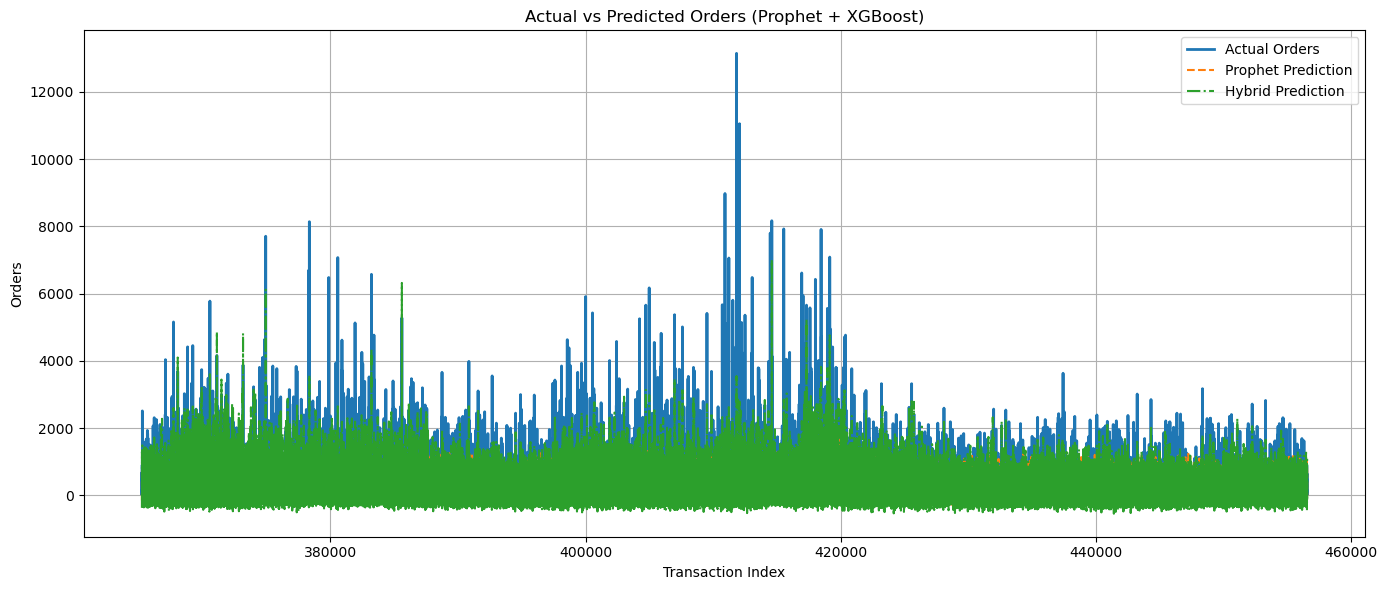

In [ ]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(df_test_encoded.index, df_test_encoded['y'], label='Actual Orders', linewidth=2)
plt.plot(df_test_encoded.index, prophet_test_forecast['yhat'], label='Prophet Prediction', linestyle='--')
plt.plot(df_test_encoded.index, hybrid_preds, label='Hybrid Prediction', linestyle='-.')
plt.xlabel('Transaction Index')
plt.ylabel('Orders')
plt.title('Actual vs Predicted Orders (Prophet + XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary:** Assigns values to variables.

In [ ]:

df_test1 = pd.read_csv("../Data/test.csv")


df_CentInf = pd.read_csv('../Data/fulfilment_center_info.csv')
df_MealInf = pd.read_csv('../Data/meal_info.csv')



**Summary:** Assigns values to variables.

In [ ]:
df_TrMerg1 = pd.merge(df_test1, df_CentInf, how='inner', on='center_id')

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df_test2 = pd.merge(df_TrMerg1, df_MealInf, how='inner', on='meal_id')
print(df_test.head())

             id  center_id  meal_id  checkout_price  base_price  \
365238  1167646        143     1445          726.53      727.53   
365239  1119716         59     2867          688.73      687.73   
365240  1150884        145     1770          484.03      485.03   
365241  1154838         72     1993          151.35      147.50   
365242  1183400         53     1247          445.23      446.23   

        emailer_for_promotion  homepage_featured  city_code  region_code  \
365238                      0                  0        562           77   
365239                      0                  0        456           56   
365240                      0                  0        620           77   
365241                      0                  1        638           56   
365242                      0                  0        590           56   

        center_type  op_area  category  cuisine                            ds  \
365238            1      3.8         8        3 1970-01-01 

**Summary:** Executes general Python code.

In [ ]:
# --- Convert week to datetime and prepare target ---
for df in [df_test2]:
    df['ds'] = pd.to_datetime(df['week'])
    # df['y'] = df.get('num_orders', 0)  # fill test y with zeros if not present
    df['promotion'] = df['emailer_for_promotion'] | df['homepage_featured']
    df.drop(columns=['week'], errors='ignore', inplace=True)

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
# --- Group-aware lag: promotion_last_week ---
df_all2 = pd.concat([df_test2]).sort_values(['center_id', 'meal_id', 'ds']).reset_index(drop=True)
df_all2['promotion_last_week'] = df_all2.groupby(['center_id', 'meal_id'])['promotion'].shift(1).fillna(0).astype(int)
print(df_all2.head())

        id  center_id  meal_id  checkout_price  base_price  \
0  1177098         10     1062          190.18      190.18   
1  1486011         10     1062          193.03      194.03   
2  1301735         10     1062          191.09      191.09   
3  1273097         10     1062          189.15      189.15   
4  1450902         10     1062          194.06      193.06   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        590           56   
1                      0                  0        590           56   
2                      0                  0        590           56   
3                      0                  0        590           56   
4                      0                  0        590           56   

  center_type  op_area   category  cuisine                            ds  \
0      TYPE_B      6.3  Beverages  Italian 1970-01-01 00:00:00.000000146   
1      TYPE_B      6.3  Beverages  Italian 1970-

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
# --- Split back to train/test after lag ---

df_test2=df_all2.copy()
print(df_test2.head())

        id  center_id  meal_id  checkout_price  base_price  \
0  1177098         10     1062          190.18      190.18   
1  1486011         10     1062          193.03      194.03   
2  1301735         10     1062          191.09      191.09   
3  1273097         10     1062          189.15      189.15   
4  1450902         10     1062          194.06      193.06   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        590           56   
1                      0                  0        590           56   
2                      0                  0        590           56   
3                      0                  0        590           56   
4                      0                  0        590           56   

  center_type  op_area   category  cuisine                            ds  \
0      TYPE_B      6.3  Beverages  Italian 1970-01-01 00:00:00.000000146   
1      TYPE_B      6.3  Beverages  Italian 1970-

**Summary:** Assigns values to variables.

In [ ]:
# --- Categorical and continuous features ---
categorical_vars2 = ['center_id', 'meal_id', 'emailer_for_promotion',
                    'homepage_featured', 'city_code', 'op_area', 'category', 'promotion_last_week']
continuous_vars2 = ['checkout_price', 'base_price']

**Summary:** Calls function: `print()`.

In [ ]:

print(df_test2.head())



        id  center_id  meal_id  checkout_price  base_price  \
0  1177098         10     1062          190.18      190.18   
1  1486011         10     1062          193.03      194.03   
2  1301735         10     1062          191.09      191.09   
3  1273097         10     1062          189.15      189.15   
4  1450902         10     1062          194.06      193.06   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        590           56   
1                      0                  0        590           56   
2                      0                  0        590           56   
3                      0                  0        590           56   
4                      0                  0        590           56   

  center_type  op_area   category  cuisine                            ds  \
0      TYPE_B      6.3  Beverages  Italian 1970-01-01 00:00:00.000000146   
1      TYPE_B      6.3  Beverages  Italian 1970-

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
cat_var2 = ['center_type',
 'category',
 'cuisine']



df_encoded_test2=df_test2.copy()

for i in cat_var2:
    df_encoded_test2[i] = pd.factorize(df_encoded_test2[i])[0]

print(df_encoded_test2.head())

        id  center_id  meal_id  checkout_price  base_price  \
0  1177098         10     1062          190.18      190.18   
1  1486011         10     1062          193.03      194.03   
2  1301735         10     1062          191.09      191.09   
3  1273097         10     1062          189.15      189.15   
4  1450902         10     1062          194.06      193.06   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        590           56   
1                      0                  0        590           56   
2                      0                  0        590           56   
3                      0                  0        590           56   
4                      0                  0        590           56   

   center_type  op_area  category  cuisine                            ds  \
0            0      6.3         0        0 1970-01-01 00:00:00.000000146   
1            0      6.3         0        0 1970-

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
df_encoded2 = pd.get_dummies(df_encoded_test2, columns=categorical_vars, dtype=int)
print(df_encoded2.head())

        id  checkout_price  base_price  region_code  center_type  cuisine  \
0  1177098          190.18      190.18           56            0        0   
1  1486011          193.03      194.03           56            0        0   
2  1301735          191.09      191.09           56            0        0   
3  1273097          189.15      189.15           56            0        0   
4  1450902          194.06      193.06           56            0        0   

                             ds  promotion  center_id_10  center_id_11  ...  \
0 1970-01-01 00:00:00.000000146          0             1             0  ...   
1 1970-01-01 00:00:00.000000147          0             1             0  ...   
2 1970-01-01 00:00:00.000000148          0             1             0  ...   
3 1970-01-01 00:00:00.000000149          0             1             0  ...   
4 1970-01-01 00:00:00.000000150          0             1             0  ...   

   category_6  category_7  category_8  category_9  category_10

**Summary:** Assigns values to variables. Calls function: `print()`.

In [ ]:
# --- Align columns ---

df_test_encoded2 = df_encoded2.copy()
print(df_test_encoded2.head())

        id  checkout_price  base_price  region_code  center_type  cuisine  \
0  1177098          190.18      190.18           56            0        0   
1  1486011          193.03      194.03           56            0        0   
2  1301735          191.09      191.09           56            0        0   
3  1273097          189.15      189.15           56            0        0   
4  1450902          194.06      193.06           56            0        0   

                             ds  promotion  center_id_10  center_id_11  ...  \
0 1970-01-01 00:00:00.000000146          0             1             0  ...   
1 1970-01-01 00:00:00.000000147          0             1             0  ...   
2 1970-01-01 00:00:00.000000148          0             1             0  ...   
3 1970-01-01 00:00:00.000000149          0             1             0  ...   
4 1970-01-01 00:00:00.000000150          0             1             0  ...   

   category_6  category_7  category_8  category_9  category_10

**Summary:** Calls function: `print()`.

In [ ]:
print(all_regressors_prophet)


['checkout_price', 'base_price', 'center_id_10', 'center_id_11', 'center_id_13', 'center_id_14', 'center_id_17', 'center_id_20', 'center_id_23', 'center_id_24', 'center_id_26', 'center_id_27', 'center_id_29', 'center_id_30', 'center_id_32', 'center_id_34', 'center_id_36', 'center_id_39', 'center_id_41', 'center_id_42', 'center_id_43', 'center_id_50', 'center_id_51', 'center_id_52', 'center_id_53', 'center_id_55', 'center_id_57', 'center_id_58', 'center_id_59', 'center_id_61', 'center_id_64', 'center_id_65', 'center_id_66', 'center_id_67', 'center_id_68', 'center_id_72', 'center_id_73', 'center_id_74', 'center_id_75', 'center_id_76', 'center_id_77', 'center_id_80', 'center_id_81', 'center_id_83', 'center_id_86', 'center_id_88', 'center_id_89', 'center_id_91', 'center_id_92', 'center_id_93', 'center_id_94', 'center_id_97', 'center_id_99', 'center_id_101', 'center_id_102', 'center_id_104', 'center_id_106', 'center_id_108', 'center_id_109', 'center_id_110', 'center_id_113', 'center_id_124'

**Summary:** Assigns values to variables.

In [ ]:
# --- Get base predictions and residuals ---

forecast_test_uns2 = model.predict(df_test_encoded2[['ds'] + all_regressors_prophet])


/Users/basartemur/miniforge3/envs/scm-env/lib/python3.9/site-packages/prophet/forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)


**Summary:** Assigns values to variables.

In [ ]:
# Forecast on test set

X_test_xgb2 = df_test_encoded2[all_regressors_xgb]
residual_preds2 = xgb_model.predict(X_test_xgb2)
hybrid_preds2 = forecast_test_uns2['yhat'] + residual_preds2

**Summary:** Assigns values to variables.

In [ ]:
ypred2 = pd.DataFrame(hybrid_preds2)

**Summary:** Assigns values to variables.

In [ ]:
#join predictions to original unseen dataset
predictions2 = pd.merge(df_test1, ypred2, left_index=True, right_index=True, how='inner')

**Summary:** Calls function: `print()`.

In [ ]:
#Create named column num_orders using data from column index 0
print(predictions2.head())


        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured        yhat  
0                      0                  0  952.266312  
1                      0                  0  324.801126  
2                      0                  0  758.056236  
3                      0                  0  528.916769  
4                      0                  0  108.391142  


**Summary:** Assigns values to variables.

In [ ]:
predictions2['num_orders2'] = predictions2['yhat']

**Summary:** Assigns values to variables.

In [ ]:
#Create prediction series for plotting
ts_tot_pred2 = predictions2.groupby(['week'])['num_orders2'].sum()
ts_tot_pred2 = pd.DataFrame(ts_tot_pred2)

**Summary:** Assigns values to variables.

In [ ]:
df_base = pd.read_csv("../Data/train_proc.csv")
ts_base=df_base.groupby(['week'])['num_orders'].sum()
ts_base2 = pd.DataFrame(ts_base)

**Summary:** Assigns values to variables. Imports libraries.

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_base2.index,
        y=ts_base2['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=ts_tot_pred2.index,
        y=ts_tot_pred2['num_orders2'],
        name='Predicted',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    )
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

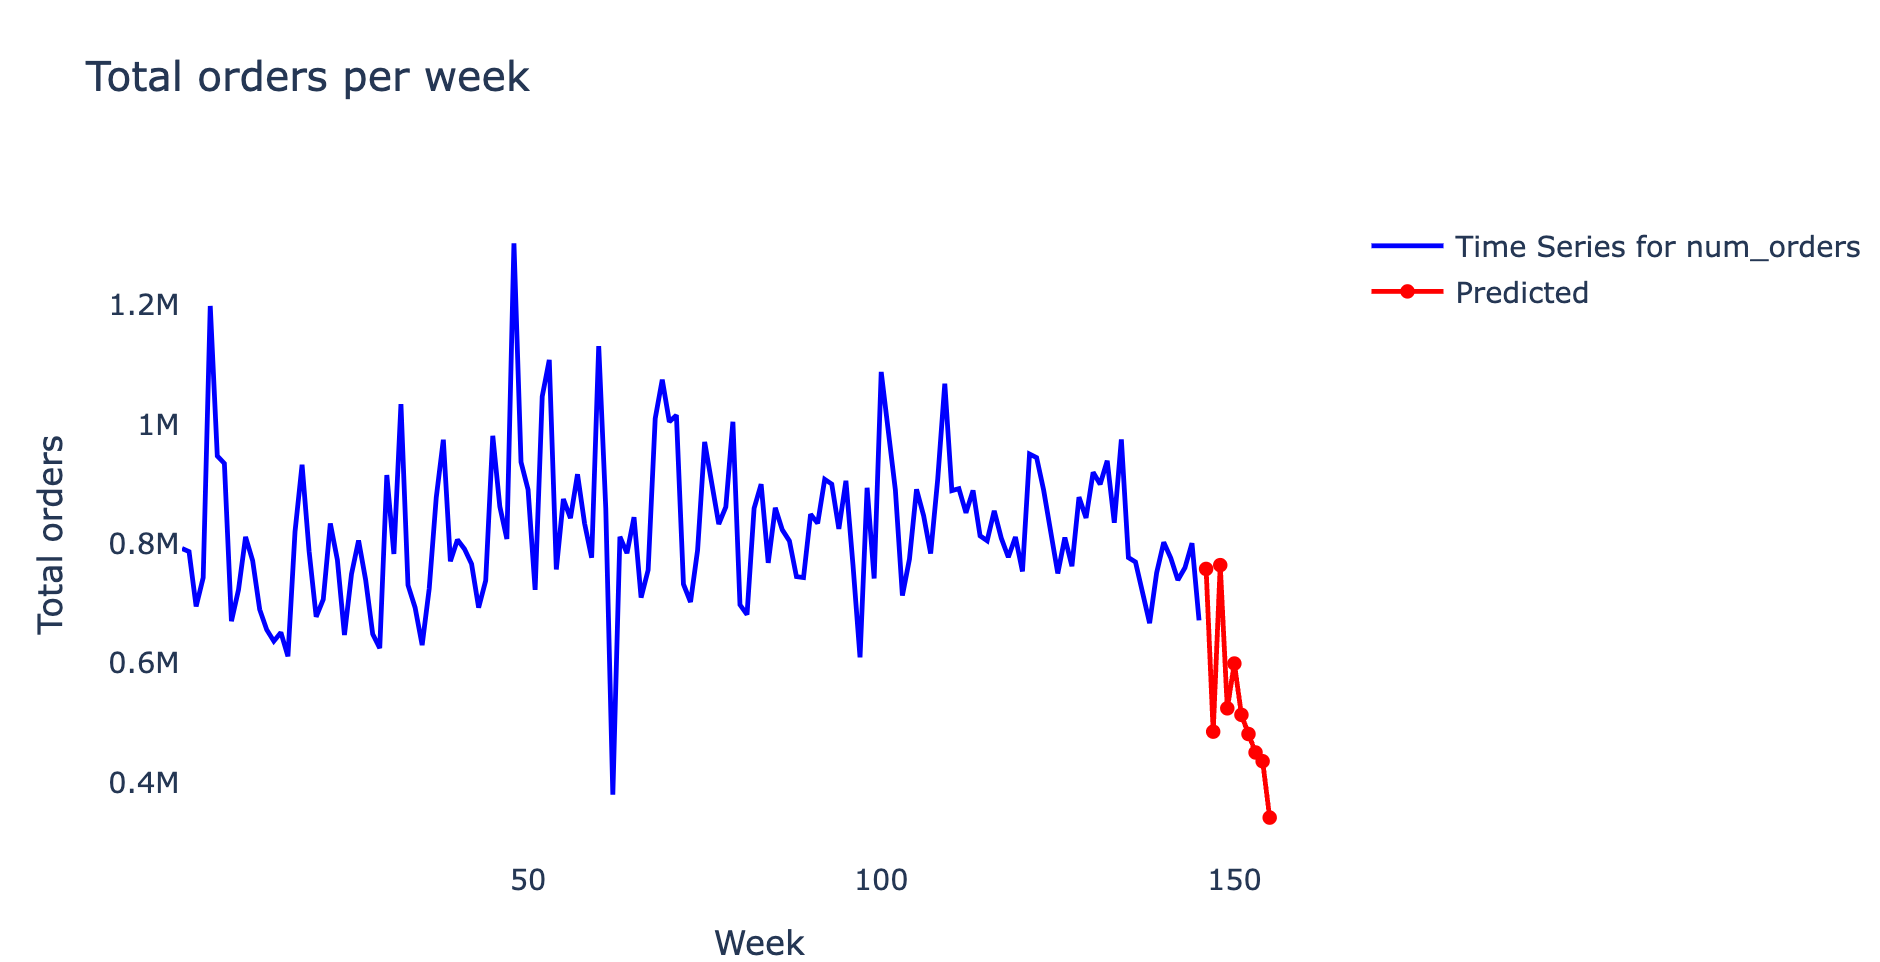

In [1]:
from IPython.display import Image, display
display(Image("Images/ts2.png"))

## References
https://www.kaggle.com/code/sreshta140/getting-started-with-demand-forecasting/notebook

I used ChatGPT in general code assistance and generation of markdown
